In [181]:
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go


# Retrieve COVID data from ECDC 

In [95]:
covid_url = "https://opendata.ecdc.europa.eu/covid19/casedistribution/json/"
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import json
import urllib

In [96]:
covid_json_unformated = urllib.request.urlopen(covid_url).read().decode("utf-8")
covid_json = json.loads(covid_json_unformated)
cdf = pd.DataFrame(covid_json['records'])

In [97]:
cdf.sample(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
60424,02/05/2020,02,05,2020,2,0,Venezuela,VE,VEN,28515829.0,America,0.37873702
9545,31/08/2020,31,08,2020,6,0,Burundi,BI,BDI,11530577.0,Africa,0.27752297
42622,09/12/2020,09,12,2020,381,2,Norway,NO,NOR,5328212.0,Europe,103.5994814
30123,28/10/2020,28,10,2020,4,0,Jersey,JE,JEY,107796.0,Europe,71.43122194
47847,05/11/2020,05,11,2020,8,0,Saint_Lucia,LC,LCA,182795.0,America,36.10602041
26324,15/05/2020,15,05,2020,37,6,Hungary,HU,HUN,9772756.0,Europe,5.66882055
1219,05/04/2020,05,04,2020,27,1,Andorra,AD,AND,76177.0,Europe,496.21276763
40844,28/10/2020,28,10,2020,2,0,New_Zealand,NZ,NZL,4783062.0,Oceania,1.44259054
3347,12/10/2020,12,10,2020,1298,6,Austria,AT,AUT,8858775.0,Europe,141.29493073
5721,24/04/2020,24,04,2020,976,156,Belgium,BE,BEL,11455519.0,Europe,152.11881714


In [98]:
cdf.shape

(61900, 12)

In [99]:
cdf.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.01377925
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.05277624
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.86876792
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.13426564
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.96865815


Rename columns to something more Pythonian. If you think they look already great, then at least rename `notification_rate_per_100000_population_14-days` to `14d-incidence`

In [100]:
cdf.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

In [101]:
cdf = cdf.rename(columns={'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000':'14d-incidence'})

cdf.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,14d-incidence
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.01377925
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.05277624
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.86876792
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.13426564
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.96865815


Identify which columns have not been casted to an appropriate type during loading!

In [102]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dateRep                  61900 non-null  object 
 1   day                      61900 non-null  object 
 2   month                    61900 non-null  object 
 3   year                     61900 non-null  object 
 4   cases                    61900 non-null  int64  
 5   deaths                   61900 non-null  int64  
 6   countriesAndTerritories  61900 non-null  object 
 7   geoId                    61900 non-null  object 
 8   countryterritoryCode     61777 non-null  object 
 9   popData2019              61777 non-null  float64
 10  continentExp             61900 non-null  object 
 11  14d-incidence            61900 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 5.7+ MB


In [103]:
cdf['14d-incidence'] = pd.to_numeric(cdf['14d-incidence'])

We did not cover datetime objects in pandas, however they are quite powerful!

Try:

In [104]:
cdf['date_reported'] = pd.to_datetime(cdf['dateRep'], format = "%d/%m/%Y")

Now you can treat the column as a datetime objects using `df[col].dt` , e.g. https://docs.python.org/3/library/datetime.html#datetime.date.year

In [105]:
cdf['date_reported'].dt.day.head()

0    14
1    13
2    12
3    11
4    10
Name: date_reported, dtype: int64

Create a new column `deltaTime_since_start_of_recording`

In [106]:
beginning_covid = min(cdf['date_reported'])

In [107]:
cdf['deltaTime_since_start_of_recording'] = cdf['date_reported'] - beginning_covid

cdf.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,14d-incidence,date_reported,deltaTime_since_start_of_recording
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779,2020-12-14,349 days
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776,2020-12-13,348 days
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768,2020-12-12,347 days
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266,2020-12-11,346 days
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658,2020-12-10,345 days


Create histograms for different columns or describe the df. Can you spot the inconsistency in the data? Fix it! :)

<AxesSubplot:>

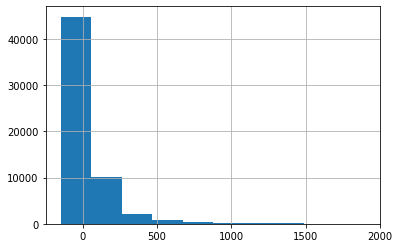

In [108]:
#cdf.hist(bins=100, figsize = (50,25))

cdf["14d-incidence"].hist()


<AxesSubplot:>

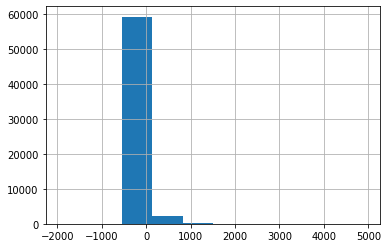

In [109]:
cdf["deaths"].hist()

<AxesSubplot:>

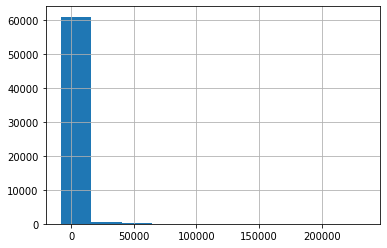

In [110]:
cdf["cases"].hist()

In [124]:
# cases, deaths & 14-day incidence shouldn't be below 0
# remove all negative entries
 
cases_below_zero = cdf["cases"] < 0
deaths_below_zero = cdf["deaths"] < 0
incidence_below_zero = cdf["14d-incidence"] < 0

cdf = cdf.drop(cdf[cases_below_zero | deaths_below_zero | incidence_below_zero].index)

cdf.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,14d-incidence,date_reported,deltaTime_since_start_of_recording
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779,2020-12-14,349 days
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776,2020-12-13,348 days
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768,2020-12-12,347 days
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266,2020-12-11,346 days
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658,2020-12-10,345 days


Identify those countries (grouped by continent) which showed the most drastic increase most drastic and decrease of the `14d-incidence` within the different years since recording. Visualize intuitively!

In [148]:
cdf_2020 = cdf[cdf["date_reported"].dt.year == 2020]
#no usable data for 2019 and 2021

increase_decrease = []
increase_decrease = cdf_2020["14d-incidence"].diff() / cdf_2020["deltaTime_since_start_of_recording"].dt.days.diff()

cdf_2020["increase/decrease"] = increase_decrease


cdf_2020.head()



/var/folders/vt/szjx9jz17v3fmxv01s8bfkg40000gn/T/ipykernel_15389/3827405841.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,14d-incidence,date_reported,deltaTime_since_start_of_recording,increase/decrease
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779,2020-12-14,349 days,NaN
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776,2020-12-13,348 days,1.961003
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768,2020-12-12,347 days,0.184008
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266,2020-12-11,346 days,-0.265498
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658,2020-12-10,345 days,0.165607


In [151]:
continent_cdf_2020 = cdf_2020[["countriesAndTerritories","increase/decrease"]].groupby(cdf_2020["continentExp"])
print(continent_cdf_2020.max())
print(continent_cdf_2020.min())

                                 countriesAndTerritories  increase/decrease
continentExp                                                               
Africa                                          Zimbabwe         129.057760
America                                        Venezuela         338.669556
Asia                                               Yemen         174.224744
Europe                                    United_Kingdom         858.895706
Oceania                                Wallis_and_Futuna         268.900943
Other         Cases_on_an_international_conveyance_Japan                NaN
                                 countriesAndTerritories  increase/decrease
continentExp                                                               
Africa                                           Algeria        -129.057760
America                                         Anguilla        -177.935943
Asia                                         Afghanistan        -171.621816
Europe      

Which country showed the highest/lowest fluctuation in `14d-incidence` within a year?

In [175]:
countries_cdf_2020 = cdf_2020[["14d-incidence"]].groupby(cdf_2020["countriesAndTerritories"])
fluctuation_countries = countries_cdf_2020["14d-incidence"].var()
print(fluctuation_countries[fluctuation_countries == fluctuation_countries.max()])
print(fluctuation_countries[fluctuation_countries == fluctuation_countries.min()])

countriesAndTerritories
Andorra    323948.761648
Name: 14d-incidence, dtype: float64
countriesAndTerritories
Laos    0.003126
Name: 14d-incidence, dtype: float64


Create a line plot showing the `14-incidence` for all European countries. Use `groupby` operation to generate the data list for the plotly plot. 

In [184]:
eu_cdf = cdf[cdf["continentExp"]== "Europe"]
eu_cdf.head()

eu_countries_list = eu_cdf["countriesAndTerritories"].unique()
grp_country = eu_cdf[["countriesAndTerritories","14d-incidence","date_reported"]].groupby(eu_cdf["countriesAndTerritories"])




fig = go.Figure()
x = []
y = []
for eu_country in eu_countries_list:
    eu_country_cdf = eu_cdf[eu_cdf["countriesAndTerritories"] == eu_country]
    fig.add_trace(go.Scatter(x = eu_country_cdf["date_reported"], y = eu_country_cdf["14d-incidence"], name = eu_country,
                line_shape='spline'))
    y.append(eu_country_cdf["14d-incidence"])
    x.append(eu_country_cdf["date_reported"])
    
fig.show()

Create a smoothed version of the `14d-incidence` by averaging 3 months.

In [192]:
eu_cdf.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,14d-incidence,date_reported,deltaTime_since_start_of_recording
340,14/12/2020,14,12,2020,788,14,Albania,AL,ALB,2862427.0,Europe,380.970414,2020-12-14,349 days
341,13/12/2020,13,12,2020,879,12,Albania,AL,ALB,2862427.0,Europe,382.612378,2020-12-13,348 days
342,12/12/2020,12,12,2020,802,12,Albania,AL,ALB,2862427.0,Europe,370.943958,2020-12-12,347 days
343,11/12/2020,11,12,2020,873,14,Albania,AL,ALB,2862427.0,Europe,365.459102,2020-12-11,346 days
344,10/12/2020,10,12,2020,752,15,Albania,AL,ALB,2862427.0,Europe,357.878122,2020-12-10,345 days


In [201]:
fig = go.Figure()
x = []
y = []

for eu_country in eu_countries_list:
    eu_country_cdf = eu_cdf[eu_cdf["countriesAndTerritories"] == eu_country]
    eu_country_3ma_cdf = eu_country_cdf.set_index("deltaTime_since_start_of_recording").resample("85D").mean()

    eu_3ma_list = eu_country_3ma_cdf.index.tolist()
    date_list = []
    for i in eu_3ma_list:
        date = eu_country_cdf[eu_country_cdf.deltaTime_since_start_of_recording == i]
        date = date["date_reported"].tolist()[0]
        date_list.append(date)
    eu_country_3ma_cdf["date_reported"] = date_list
    

    fig.add_trace(go.Scatter(x = eu_country_3ma_cdf["date_reported"], y = eu_country_3ma_cdf["14d-incidence"], name = eu_country,
                line_shape='spline'))
    y.append(eu_country_cdf["14d-incidence"])
    x.append(eu_country_cdf["date_reported"])
    
fig.show()




Create a radial plot of death rate / 100000 people (see popData2019), where one year completes a circle, i.e. 360˚. Visualize the recored years for Italy, Germany, Sweden and Greece. Hint you might need to turn the dateTime into `day within the year` (%j) and adjust 365 to 360 degrees. 

In [215]:
circle_cdf = eu_cdf[eu_cdf.year == "2020"] 
date_reported = circle_cdf["date_reported"].tolist()
day_within_the_year = []
for date in date_reported:
    day_within_the_year.append(pd.Period(date, freq = "D").day_of_year)

circle_cdf["day_within_the_year"] = day_within_the_year
deaths_list = circle_cdf["deaths"].tolist()
popdata_list = circle_cdf["popData2019"].tolist()
death_rate = []
for i in range(len(deaths_list)):
    deaths = float(deaths_list[i])/float(popdata_list[i]) * 100000
    death_rate.append(deaths)
circle_cdf["death_rate/100000"] = death_rate

countries = ["Italy","Germany","Sweden","Greece"]
for country in countries:
    fig = px.line_polar(circle_cdf[circle_cdf["countriesAndTerritories"] == country], 
    r = "death_rate/100000", 
    theta = "day_within_the_year", 
    line_close=True)
    fig.show()

/var/folders/vt/szjx9jz17v3fmxv01s8bfkg40000gn/T/ipykernel_15389/1451933411.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/vt/szjx9jz17v3fmxv01s8bfkg40000gn/T/ipykernel_15389/1451933411.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Optional: Find "regular" mortality rates for those countries and visualize it in the plot as well.